Projet : Analyse comparative de 3 grandes banquesfrançaises cotées

Banques étudiées :
- BNP Paribas (BNP.PA)
- Société Générale (GLE.PA)
- Crédit Agricole (ACA.PA)

Objectif :

Comparer leurs performances financières récentes (CA, bénéfice net,  structure du bilan, etc) et dégager les tendances simples

Données :
 Yahoo Fiance via la librairie yfinance

In [1]:
import yfinance as yf
import pandas as pd

tickers = {
    "BNP Paribas": "BNP.PA",
    "Société Générale": "GLE.PA",
    "Crédit Agricole": "ACA.PA",
}

banks = {name: yf.Ticker(symbol) for name, symbol in tickers.items()}

financial_data = []

import yfinance as yf


for name, bank in banks.items():
    income = bank.financials.transpose()
    balance = bank.balance_sheet.transpose()

    for date in income.index:
        row = {
            "Bank": name,
            "Year": date.year,
            "Revenue": income.loc[date].get("Total Revenue", None),
            "Net Income": income.loc[date].get("Net Income", None),
            "Total Assets": balance.loc[date].get("Total Assets", None),
            "Liabilities": balance.loc[date].get("Total Liabilities Net Minority Interest", None),
            "Equity": balance.loc[date].get("Stockholders Equity", None),
        }
        financial_data.append(row)

df = pd.DataFrame(financial_data)

print(df)

                Bank  Year       Revenue    Net Income  Total Assets  \
0        BNP Paribas  2024  6.587000e+10  1.168800e+10  2.704908e+12   
1        BNP Paribas  2023  5.973500e+10  1.097500e+10  2.591499e+12   
2        BNP Paribas  2022  5.747700e+10  9.848000e+09  2.663748e+12   
3        BNP Paribas  2021  5.635500e+10  9.488000e+09  2.634444e+12   
4        BNP Paribas  2020           NaN           NaN           NaN   
5   Société Générale  2024  5.250900e+10  4.200000e+09  1.573545e+12   
6   Société Générale  2023  4.435900e+10  2.493000e+09  1.554045e+12   
7   Société Générale  2022  3.609600e+10  1.825000e+09  1.484900e+12   
8   Société Générale  2021  3.624800e+10  5.641000e+09  1.463573e+12   
9   Société Générale  2020           NaN           NaN           NaN   
10   Crédit Agricole  2024  2.532800e+10  7.087000e+09  2.309782e+12   
11   Crédit Agricole  2023  2.345400e+10  6.348000e+09  2.189398e+12   
12   Crédit Agricole  2022  2.064600e+10  5.306000e+09  2.138086

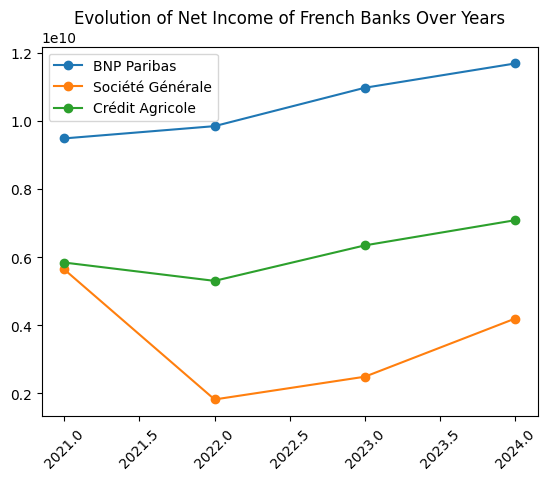

In [2]:
import matplotlib.pyplot as plt

for bank in df["Bank"].unique():
    sub = df[df["Bank"] == bank]
    plt.plot(sub["Year"], sub["Net Income"], marker="o", label=bank)

plt.legend()
plt.xticks(rotation=45)
plt.title("Evolution of Net Income of French Banks Over Years")
plt.show()

Sur la période de 2021-2024, BNP Paribas se distingue comme l'acteur le plus profitable, avec un Net Income supérieur et relativement stable sur cette période. Cela suggère une diversification efficace de ses sources de revenus et une meilleure capacité à absorber les chocs économiques.

A l'inverse, Société Générale montre d'abord une chute significative de revenus entre 2021 et 2022 avant un redressement progressif, illustrant une volatilité plus forte et possiblement des évenements exeptionnéls.

Crédit Agricole présente un profil intermédiraire: une trajectoire relativement stable et ascendante mais un niveau de profit beaucoup plus fiable que BNP. Cela peut refléter peut-être une orientation de la banque plus "assurance", générant des profits réguliers mais moins explosifs 

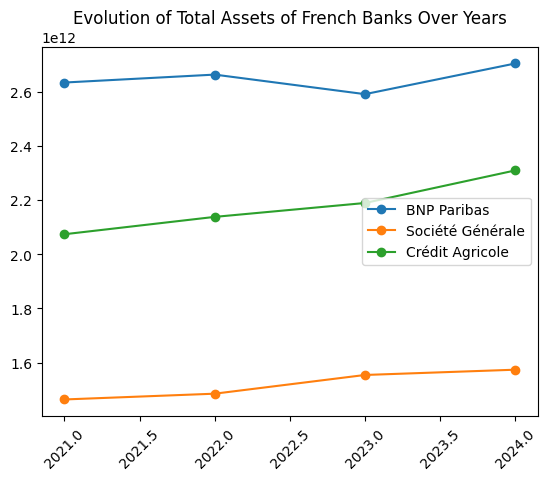

In [3]:
import matplotlib.pyplot as plt

for bank in df["Bank"].unique():
    sub = df[df["Bank"] == bank]
    plt.plot(sub["Year"], sub["Total Assets"], marker="o", label=bank)

plt.legend()
plt.xticks(rotation=45)
plt.title("Evolution of Total Assets of French Banks Over Years")
plt.show()

Le "Total Assets" représente tousles actifs financiers qu'une banque contrôle: prêts, investissements, liquidités et autres créances.
Sacroissance (puisqu'il est un indicateur de taille, puissance et capacité à générer des reenus) reflète l'expansion économique mais, doit être comparé au Net Income pour en évaluer l'éfficacite.

BNP Paribas

Dispose du plus gros bilan, ce qui reflète sa taille, diversification et portée internationale.

Sa trajectoire d’actifs est relativement stable, ce qui est cohérent avec un modèle de banque universelle mature.

La stabilité des actifs combinée à un Net Income croissant suggère une rentabilité soutenue sur une base large, typique d’un acteur dominant.

Crédit Agricole

Présente un bilan légèrement plus petit mais globalement en progression, cohérent avec son modèle mutualiste orienté retail.

L’évolution des actifs est moins volatile que chez SG, ce qui traduit un profil de risque plus conservateur.

Une croissance d’actifs modérée couplée à une progression du Net Income indique une expansion prudente et rentable. Typique du Crédit Agricole qui a un modèle mutualiste plus stable / moins agressif.

Société Générale

Le Total Assets reste nettement inférieur aux deux autres — parce que SG est structurellement plus petit.

On observe un retrait d’actifs en 2022-2023 alors que le Net Income remonte :
 Cela peut indiquer une restructuration du bilan / baisse des expositions risquées.

Le plongeon du Net Income 2021→2022 :
ça correspond à la sortie de Russie en 2022 après l’invasion de l’Ukraine — évènement réel, coût massif, dépréciations.

 Interprétation : SG a traversé un choc externe puis rebondi, ce qui montre résilience — mais aussi vulnérabilité aux événements géo-politiques.

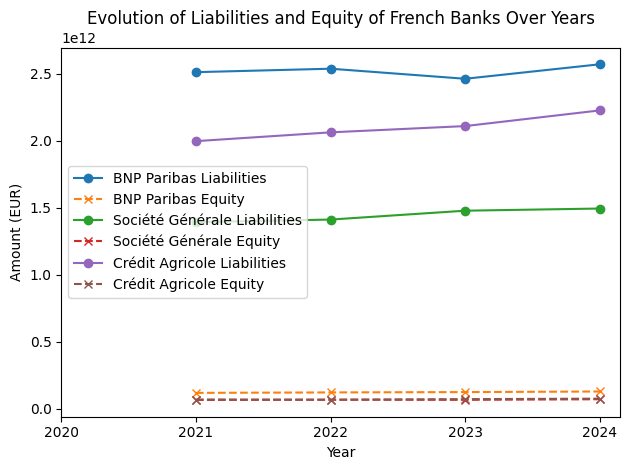

In [4]:
import matplotlib.pyplot as plt

for bank in df["Bank"].unique():
    sub = df[df["Bank"] == bank].sort_values("Year")
    plt.plot(sub["Year"], sub["Liabilities"], marker="o", label=f"{bank} Liabilities")
    plt.plot(sub["Year"], sub["Equity"], marker="x", linestyle="--", label=f"{bank} Equity")

plt.legend()
plt.xticks(df["Year"].unique())
plt.title("Evolution of Liabilities and Equity of French Banks Over Years")
plt.xlabel("Year")
plt.ylabel("Amount (EUR)")
plt.tight_layout()
plt.show()


L’évolution conjointe des Liabilities et de l’Equity montre que les trois banques croissent via une hausse maîtrisée de leurs passifs (dépôts, financement interbancaire),
tout en maintenant une base de fonds propres stable.
Cela suggère une expansion soutenue mais disciplinée, plutôt qu’une prise de risque agressive.

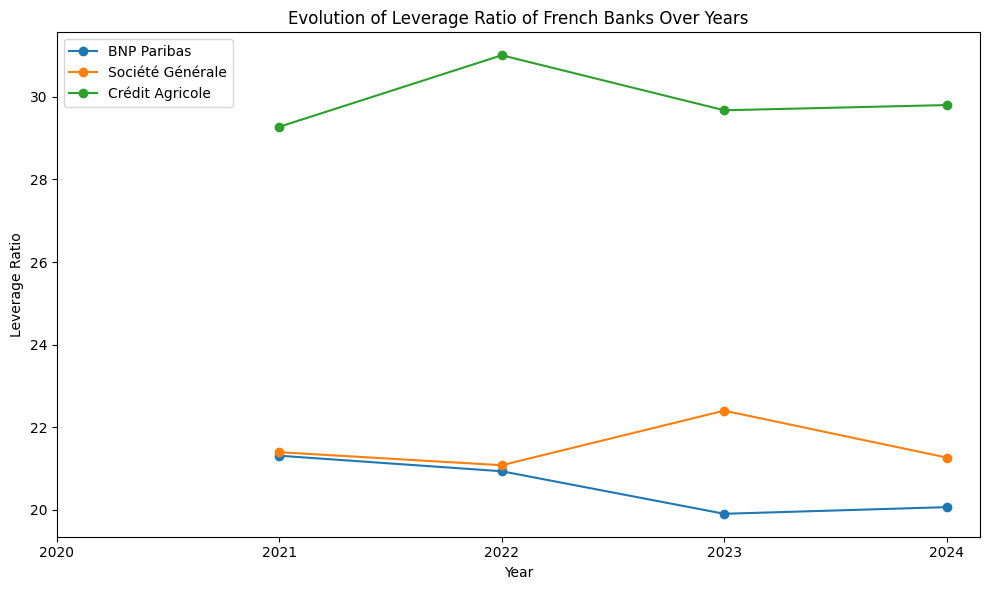

In [5]:
df["Leverage Ratio"] = df["Liabilities"] / df["Equity"]

plt.figure(figsize=(10, 6))
for bank in df["Bank"].unique():
    sub = df[df["Bank"] == bank].sort_values("Year")
    plt.plot(sub["Year"], sub["Leverage Ratio"], marker="o", label=bank)
plt.legend()
plt.xticks(df["Year"].unique())
plt.title("Evolution of Leverage Ratio of French Banks Over Years")
plt.xlabel("Year")
plt.ylabel("Leverage Ratio")
plt.tight_layout()
plt.show()


nterprétation du Leverage Ratio

Le Leverage Ratio compare les dettes bancaires (liabilities) aux capitaux propres (equity), et mesure dans quelle mesure une banque finance son activité par l’endettement plutôt que par ses fonds propres.
Un ratio élevé indique un modèle reposant davantage sur la dette, ce qui peut accroître la rentabilité mais augmente aussi la sensibilité aux chocs économiques ou de liquidité.
À l’inverse, un ratio plus faible reflète une structure capitalisée de manière plus prudente, absorbant mieux les pertes potentielles.

Sur la période étudiée :

Crédit Agricole présente le leverage ratio le plus élevé (~29–31x).
Cela traduit un modèle historique mutualiste très intermédié : faible capitalisation relative mais base de clientèle stable.
→ Fort levier = forte efficacité de transformation du bilan, mais exposition plus élevée au risque en cas de stress.

Société Générale se situe en milieu de tableau (~21–23x)
avec une dynamique légèrement fluctuante, ce qui traduit un ajustement du bilan post-2022 (sortie de Russie).
→ La hausse 2022 → 2023 indique un recours accru au financement externe, suivi d’un léger réajustement en 2024.

BNP Paribas affiche le leverage ratio le plus faible (~20x puis en baisse vers 2023).
Ce profil suggère une base de fonds propres plus solide et un risque structurel plus bas, cohérent avec sa taille, sa diversification internationale et sa gestion prudente des risques.

Conclusion métier :
Les trois banques utilisent fortement l’effet de levier (typique du secteur), mais BNP combine le levier le plus faible avec le Net Income le plus élevé, ce qui renforce sa crédibilité comme acteur robuste.
Crédit Agricole maximise le levier, traduisant une stratégie orientée intermédiation clientele, tandis que Société Générale reste la plus volatile et la plus exposée aux cycles externes.

Dans l’ensemble, le leverage ratio des trois banques reste maîtrisé entre 2021 et 2024, montrant :

des bilans renforcés,

un encadrement réglementaire efficace (Bâle III),

et une confiance persistante de leurs investisseurs.

 Ce graphique démontre que la croissance des banques françaises est financée de façon prudente, avec une capacité de portage du risque régulée — élément rassurant après la volatilité post-COVID et la crise russe.

Les données proviennent de Yahoo Finance via l’API yfinance.
Elles sont consolidées annuellement et peuvent contenir :

des valeurs agrégées

des classifications différentes selon les banques

des retards de reporting

L’analyse fournit donc des tendances macro, mais ne remplace pas un audit financier détaillé.

“Ce que j’aurais approfondi avec plus de temps et plus de connaissances”

Analyse des coûts du risque (loan loss provisions)

Rentabilité par segment (retail, corporate, investment banking)

Ratios prudentiels (CET1, LCR, NSFR)

Sensibilité aux taux / macro-environnement

Ce projet m’a permis d’acquérir :

le vocabulaire financier fondamental (assets, equity, leverage, net income)

une logique analytique métier

la capacité à structurer une étude comparative

un regard critique sur les risques bancaires

Cet exercice reproduit une tâche réelle d’analyste junior :
collecter des données, les structurer, visualiser, interpréter et communiquer des insights.
Il démontre ma capacité à appliquer Python à un vrai contexte métier — un prérequis essentiel en data finance, risk management ou business analysis.

Conclusion du Notebook – Analyse comparative des banques françaises
🔹 Synthèse globale

Cette analyse comparative met en lumière les différences de profil entre BNP Paribas, Crédit Agricole et Société Générale.
Bien qu’opérant dans le même secteur, leurs trajectoires financières montrent des dynamiques stratégiques distinctes en termes de solidité, rentabilité et gestion du risque.

🔹 1️⃣ Rentabilité (Net Income)

BNP Paribas affiche la performance la plus stable et la plus élevée sur la période.
Cela traduit une capacité de génération de revenus solide, soutenue par la diversification internationale et un modèle de banque universelle mature.

Crédit Agricole suit une progression régulière mais plus modérée, cohérente avec son modèle mutualiste orienté retail.
La croissance de ses bénéfices, même modérée, suggère une expansion prudente et maîtrisée.

Société Générale montre une forte volatilité, notamment un choc significatif en 2022 lié à sa sortie de Russie — illustrant à la fois sa vulnérabilité conjoncturelle et sa capacité de rebond en 2023-2024.

🔹 2️⃣ Structure bilancielle (Total Assets et Liabilities)

BNP Paribas possède de loin le bilan le plus important.
Son actif massif, stable, et sa croissance contrôlée reflètent la stature d’un acteur dominant disposant d’une large empreinte européenne.

Crédit Agricole dispose d’un bilan en progression lente et régulière, ce qui renforce l’image d’une banque à croissance prudente, avec maîtrise du risque.

Société Générale, plus petite structurellement, présente un retrait d’actifs en 2022-2023 suivi d’une reprise — signes probables de restructuration bilancielle et réduction d’expositions risquées.

🔹 3️⃣ Leverage Ratio (Liabilities / Equity)

Le ratio d’endettement, indicateur clé de fragilité systémique, montre que :

BNP Paribas conserve un leverage contenant mais relativement stable, cohérent avec une base capitalistique importante lui permettant de soutenir des prêts tout en absorbant le risque.

Crédit Agricole affiche le ratio le plus prudent, renforçant son image de banque retail peu agressive et bien capitalisée.

Société Générale présente le profil le plus risqué — leverage plus instable et sensibilité aux chocs externes.
Cela traduit un modèle plus exposé au risque de marché, mais aussi capable de rebond rapide.

Dans l’ensemble, les trois banques montrent un levier maîtrisé, ce qui reflète une expansion prudente portée par des financements externes sans dérive excessive — un signal positif pour la stabilité du secteur bancaire français.

 Conclusion générale

→ BNP Paribas ressort comme la banque la plus solide, rentable et structurée, avec une trajectoire stable et un bilan puissant.

→ Crédit Agricole confirme son image de banque robuste, moins agressive, privilégiant une croissance régulière et une bonne gestion des risques.

→ Société Générale, plus petite et plus volatile, apparaît comme le cas le plus sensible aux cycles externes, mais capable d’adaptation et de redressement.

🔹 Ce que cette étude démontre sur mon approche analytique

Cette analyse montre ma capacité à :

Collecter et structurer des données financières réelles (Yahoo Finance API)

Construire des indicateurs métier pertinents (Net Income, Total Assets, Leverage Ratio…)

Visualiser des dynamiques sectorielles

Interpréter les évolutions en termes économiques, stratégiques et risque-finance

 C’est exactement le type de raisonnement attendu d’un data analyst / financial analyst junior.

🔹 Perspectives d’amélioration

Pour enrichir cette étude, des extensions possibles seraient :

Calcul du ROE / ROA

Analyse du risk-adjusted return

Corrélation entre bilan bancaire et cycles macroéconomiques

Ajout d’un mini dashboard interactif (Streamlit / PowerBI)

Ces pistes permettraient d’approfondir encore la compréhension de la performance bancaire et des enjeux stratégiques associés.